# Plotting the Fraction of Dark Matter from Observational Datasets

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import glob

#################
# Plot parameters
params = {
    "font.size": 11,
    "font.family": "Arial Black",
    "text.usetex": True,
    "figure.figsize": (4, 3),
    "figure.subplot.left": 0.15,
    "figure.subplot.right": 0.95,
    "figure.subplot.bottom": 0.16,
    "figure.subplot.top": 0.95,
    "figure.subplot.wspace": 0.3,
    "figure.subplot.hspace": 0.3,
    "lines.markersize": 2,
    "lines.linewidth": 1.5,
}
plt.rcParams.update(params)

## FDM as a function of the radius (only for SPARC dataset)

### Useful functions

In [242]:
def string_to_array(string):
    """
    Convert a string representing an array in a CSV file to an array.

    Args:
        string (str): The string representing the array.

    Returns:
        numpy.ndarray: The array converted from the string.
    """
    array = []
    for i in range(len(string)):
        element = string[i][0]
        array.append(np.array(eval(element)))

    return array


def finding_index(name, data):
    """
    Find the index of a row in a DataFrame where the 'Name' column matches a given name.
    
    Args:
        name (str): The name to search for in the 'Name' column.
        data (DataFrame): The DataFrame in which to search for the name.
        
    Returns:
        int: The index of the first row where the 'Name' column matches the given name.
    """
    return data.loc[data['Name'] == name].index[0]


### Plotting
Only the SPARC dataset contains an array of radii, so we can only make this plot with this dataset. The dataset description is available on the website (http://astroweb.cwru.edu/SPARC/), here is an excerpt :
> SPARC is a database of 175 late-type galaxies (spirals and irregulars) with Spitzer photometry at 3.6 µm (tracing the stellar mass distribution) and high-quality HI+Hα rotation curves (tracing the gravitational potential out to large radii). SPARC spans a wide range in stellar masses (5 dex), surface brightnesses (>3 dex), and gas fractions.

Fore more, check the master paper "http://astroweb.cwru.edu/SPARC/".


In [243]:
# Loading the dataset
df = pd.read_csv('dataset/SPARC.csv', header=[0,1])
df

,Name,M*,Reff,fDM(Reff),sigma_fdm(Reff),fDM,sigma_fdm,Radius
,(SDSS),[Msun],[kpc],None,None,None,None,[kpc]
0,NGC3953,7.065050e+10,6.17,0.428612,0.032743,"0.3641071029577853, 0.41844809507631825, 0.437...","0.05269830638471392, 0.0372422402167875, 0.029...","3.5, 5.24, 6.98, 8.72, 10.47, 12.19, 13.94, 15.68"
1,NGC6674,1.073270e+11,7.75,0.621984,0.021062,"0.33667573640305415, 0.6216797060018467, 0.627...","0.48300310456088286, 0.02123903404901913, 0.01...","2.5, 7.49, 12.54, 17.45, 22.47, 27.48, 32.5, 3..."
2,NGC2998,7.545100e+10,7.06,0.428937,0.059315,"0.8774324938271605, 0.7218334687999999, 0.6011...","0.05447444718792868, 0.066759967488, 0.0808464...","0.33, 0.99, 1.98, 2.64, 3.63, 7.59, 12.5, 17.4..."
3,D631-7,9.800000e+07,1.22,0.203714,0.152204,"-0.7031427395900637, 0.04382243403610694, 0.26...","0.6399442398459693, 0.2385072130831284, 0.1322...","0.45, 0.9, 1.35, 1.8, 2.25, 2.69, 3.14, 3.59, ..."
4,NGC3917,1.098300e+10,5.56,0.633157,0.022692,"-0.07555555555555585, 0.5406697938345475, 0.66...","0.34524005486968457, 0.07223337919537359, 0.04...","0.87, 1.74, 2.61, 3.5, 4.37, 5.24, 6.11, 6.98,..."
...,...,...,...,...,...,...,...,...
95,IC4202,8.987450e+10,8.55,0.488357,0.024418,"-9.348312854603451, -2.7390733289280056, -0.78...","2.335003926166932, 0.37918715402479125, 0.2081...","0.77, 1.59, 2.36, 3.13, 3.95, 4.73, 5.5, 6.27,..."
96,NGC3877,3.626750e+10,4.39,0.547151,0.036542,"-2.6314412040536386, -0.030266505195596927, 0....","1.7292577162160183, 0.2315205629653027, 0.0714...","0.87, 1.74, 2.61, 3.5, 4.37, 5.24, 6.11, 6.98,..."
97,NGC4559,9.688500e+09,3.82,0.356830,0.062908,"0.09332520172640262, 0.2965281295794877, 0.272...","0.451267365350786, 0.1689647389701604, 0.17105...","0.67, 1.32, 1.97, 2.62, 3.28, 3.93, 4.58, 5.22..."


You can plot the dark matter fraction as a function of radius for a galaxy in the dataset, 
either by choosing a random index or by using the galaxy's name

In [244]:
i = finding_index('NGC6674', pd.read_csv('dataset/SPARC.csv'))
#i = 3

The following quantities are extracted from the dataset:

- <span style="background-color: lightgray">fDM</span>: This represents the dark matter fraction.
- <span style="background-color: lightgray">radius</span>: This represents the radius (kpc).
- <span style="background-color: lightgray">sigma_fdm</span>: This represents the uncertainty on the dark matter fraction.

These quantities are obtained using the following code:
```python
fDM = string_to_array(df['fDM'][i])
radius = string_to_array(df['Radius'][i])
sigma_fdm = string_to_array(df['sigma_fdm'][i])
radius = string_to_array(df['Radius'][i])
sigma_fdm = string_to_array(df['sigma_fdm'][i])


For our analysis, we employ a constant mass-to-light ratio of $Γ = 0.5 M⊙/L⊙$, as determined by stellar population synthesis models (Schombert & McGaugh 2014) based on a Chabrier IMF. Following Lelli (2016) and utilizing their rotation curve calculations, we compute the fraction of dark matter using, with $\Gamma_{bul} = 1.4\Gamma_{disk}$ and $\Gamma_{disk} = 0.5$ : 

$V_{bar}^2 = V_{gas}|V_{gas}| + \Gamma_{disk}V_{disk}|V_{disk}| + \Gamma_{bul}V_{bul}|V_{bul}|$

$f_{DM} = \frac{{V_{obs}^2 - V_{bar}^2}}{{V_{obs}^2}}$

In [245]:
fDM = string_to_array(df['fDM'].values)[i]
radius = string_to_array(df['Radius'].values)[i]
sigma_fdm = string_to_array(df['sigma_fdm'].values)[i]
name = df['Name'].values[i]

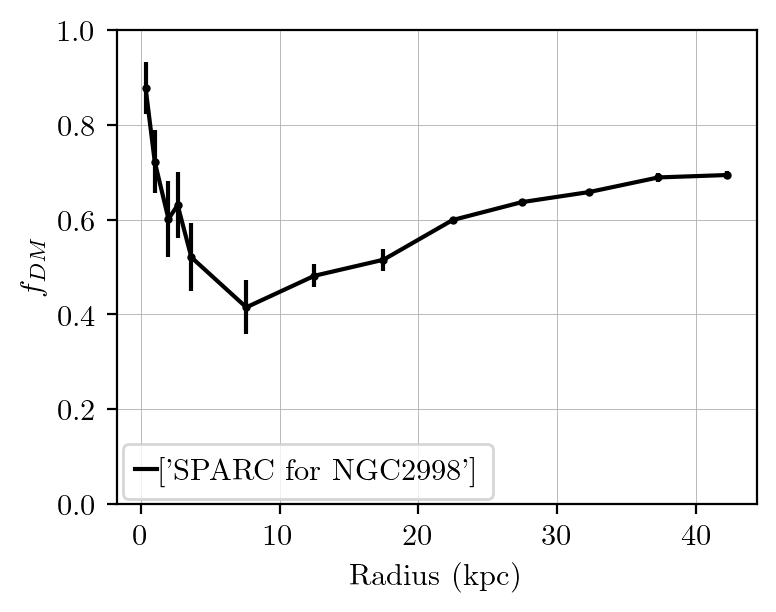

In [246]:
plt.figure(dpi = 200) 
plt.errorbar(radius, fDM, yerr=sigma_fdm, fmt='o', color='black')
plt.plot(radius, fDM, color = 'black', label = 'SPARC for '+name)

plt.xlabel('Radius (kpc)')
plt.ylabel(r'$f_{DM}$')
plt.ylim([0,1])
plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)

plt.show()

### Plotting for several galaxies

To compare with simulation results, it may be useful to select a mass range to plot the statistical average of the dark matter fraction as a function of radius.

In [256]:
# Select the data
i = np.where((df['M*'].values<2e11) & (df['M*'].values>9e10))[0]

fDM = string_to_array(df['fDM'].values[i])
radius = string_to_array(df['Radius'].values[i])
sigma_fdm = string_to_array(df['sigma_fdm'].values[i])
name = df['Name'].values[i]
nbgal = len(i)

/tmp/ipykernel_784717/1985701256.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(common_radii, mean_values + std_deviation, 'r--', label=r'$\pm 1\sigma$', color='gray', linewidth=0.8, alpha=0.4)
/tmp/ipykernel_784717/1985701256.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(common_radii, mean_values - std_deviation, 'r--', color='gray', linewidth=0.8, alpha=0.4)


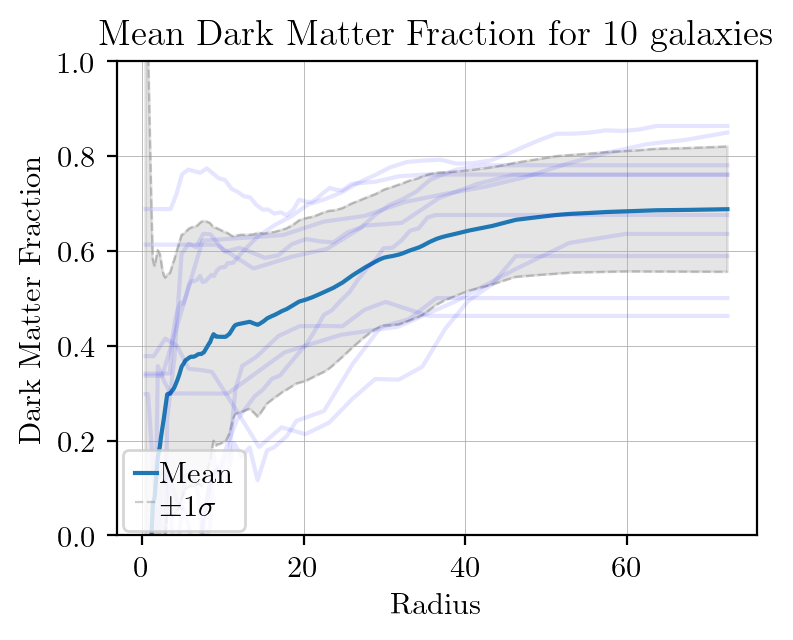

In [258]:
# Assume you have your array of radii for each galaxy
radius_array = radius
# Create a list of all unique radii
common_radii = np.unique(np.concatenate(radius_array))

# Initialize lists to store interpolated values for each galaxy
interpolated_values = []

# Interpolate dark matter fraction values for each galaxy at each common radius
for galaxy_radii, fraction in zip(radius_array, fDM):
    galaxy_values = []  # List to store interpolated values for this galaxy
    for i, r in enumerate(common_radii):
        galaxy_values.append(np.interp(r, galaxy_radii, fraction))
    interpolated_values.append(galaxy_values)

# Convert the lists to numpy arrays for further calculations
interpolated_values = np.array(interpolated_values)

# Calculate the mean and standard deviation of the interpolated values for each radius
mean_values = np.mean(interpolated_values, axis=0)
std_deviation = np.std(interpolated_values, axis=0)

plt.figure(dpi=200)
plt.plot(common_radii, mean_values, label='Mean')

# Plot the curves for the standard deviation
plt.plot(common_radii, mean_values + std_deviation, 'r--', label=r'$\pm 1\sigma$', color='gray', linewidth=0.8, alpha=0.4)
plt.plot(common_radii, mean_values - std_deviation, 'r--', color='gray', linewidth=0.8, alpha=0.4)
for values in interpolated_values:
    plt.plot(common_radii, values, color='blue', alpha=0.1)
# Fill the area between the two standard deviation curves with adjusted transparency
plt.fill_between(common_radii, mean_values - std_deviation, mean_values + std_deviation, color='gray', alpha=0.2)
plt.ylim([0, 1])
plt.xlabel('Radius')
plt.ylabel('Dark Matter Fraction')
plt.title('Mean Dark Matter Fraction for '+str(nbgal)+' galaxies')
plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
plt.grid(linestyle='-', linewidth=0.3)
plt.show()


### FDM as a function of the stellar mass (for all datasets)

The dataset from SPARC is describe below.

The dataset from Cappellari (merged from 2 datasets : https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.1709C/abstract and https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.1862C/abstract) consists of early-type galaxies, which include elliptical galaxies (Es) and lenticular galaxies (S0s). The dataset specifically includes a sample of 260 such galaxies. The stellar mass range covered by this dataset is approximately greater than or equal to $6 \times 10^9$ solar masses ($M_{\odot}$). We directly use the dark matter fraction from the dataset and the mass-to-light ratio (Cappellari assuming a Salpeter IMF) and using also the luminosity in the r-band, we derive the stellar mass. To have the stellar masses calculated assuming a Chabrier IMF we need to substract the stellar mass from 0.25 dex (section 4.1 in this work https://ui.adsabs.harvard.edu/abs/2024MNRAS.tmp..878L/abstract). Cappellari employs the model 'JAM with NFW dark halo:' and assumes that the halo is spherical, characterized by a two-parameter double power-law NFW profile. They adopt the mass-concentration M200-c200 relation (Navarro et al. 1996) provided by Klypin et al. (2011) to make the halo profile a unique function of its mass M200, thus extracting the fraction of dark matter and (M/L)_stars.

The dataset from Bezanson et al. 2015 includes 103  early- and late-type, or alternatively quiescent an 
star-forming, galaxies. They use a Chabrier IMF for the stellar mass M*. We use their velocity dispersion measurements (details in section 2.5 https://ui.adsabs.harvard.edu/abs/2015ApJ...799..148B/abstract) and then calculate the fDM within the effective radius $R_e$ with : 

$f_{DM} = 1 - \frac{M*}{M_{dyn}}$

with $M_{dyn}$ extracted from the Virial theorem : 

$M_{dyn}(r<R_e) = \frac{KR_e\sigma^2(r<R_e)}{G}$

and assuming $K = 5$ (http://dx.doi.org/10.1111/j.1365-2966.2005.09981.x).

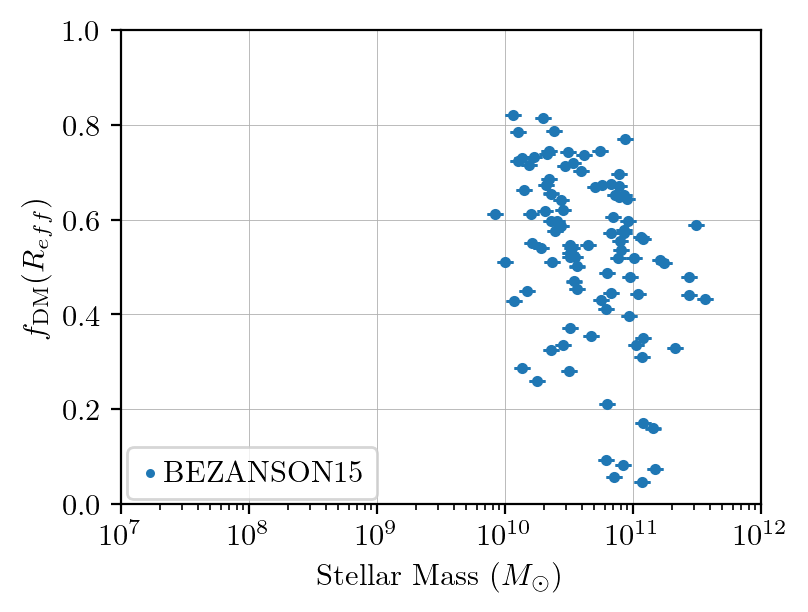

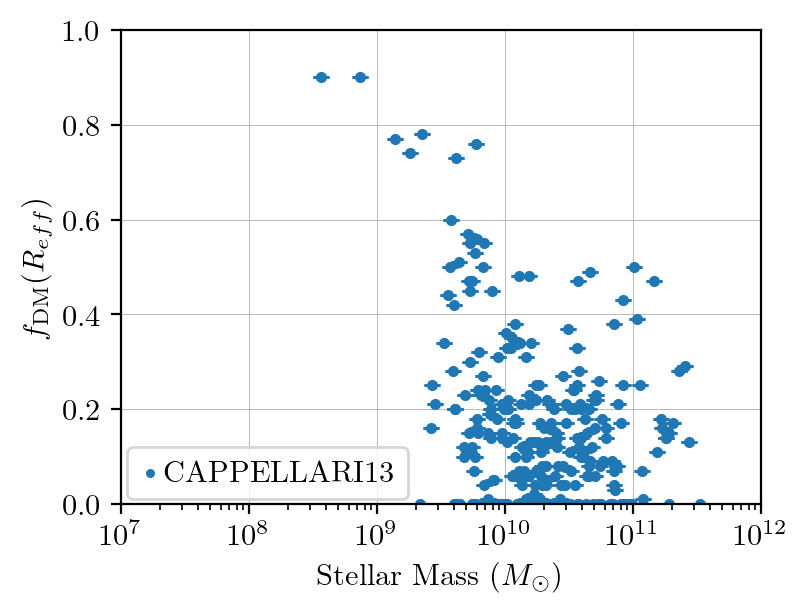

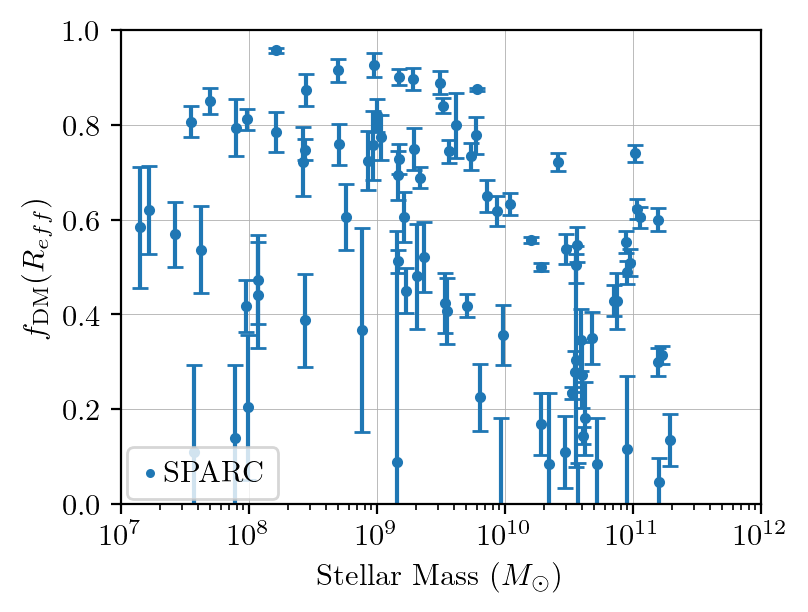

In [15]:
file_names = []

for file_path in glob.glob('dataset/*.csv'):
    file_name = file_path.split('/')[-1].split('.')[0]
    file_names.append(file_name)
    
    df = pd.read_csv(file_path)
    M = np.float64(np.array(df["M*"].iloc[1:].values))
    fDMReff = np.array(df['fDM(Reff)'].iloc[1:].values)
    sigma_fdmReff = np.array(df['sigma_fdm(Reff)'].iloc[1:].values)
    # Adding the transformation from Salpeter IMF to Chabrier.
    if file_name == 'CAPPELLARI13':
        M = 10**(np.log10(M)-0.25)
        
    plt.figure(dpi = 200) 
    plt.scatter(M, fDMReff, label=file_name, s=5)
    plt.errorbar(M, fDMReff, yerr=sigma_fdmReff, fmt='o', markersize=3, capsize=3)
    
    plt.xlabel(r'Stellar Mass ($M_{\odot}$)')
    plt.ylabel(r'$f_{\mathrm{DM}}(R_{eff})$')
    plt.ylim([0, 1])
    plt.xlim([10**7, 10**12])
    plt.xscale('log')
    plt.legend(loc=[0.01, 0.01], labelspacing=0.05,
           handlelength=0.7, handletextpad=0.1,
           frameon=True, fontsize=11, ncol=1)
    plt.grid(linestyle='-', linewidth=0.3)
    plt.show()
